In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# loading the dataset
btc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/btc_hourly.csv")
btc.head() # seems to have lot of empty values

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# setting new index and converting the Timestamp columne to timestamp type
btc['Timestamp'] = pd.to_datetime(btc.Timestamp)
btc.set_index('Timestamp', inplace=True)
btc.head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Describing Data

In [ ]:
# printing the columns names
btc.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [ ]:
btc.info() # all the columns are of float type

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81066 entries, 2011-12-31 07:00:00 to 2021-03-31 00:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               77534 non-null  float64
 1   High               77534 non-null  float64
 2   Low                77534 non-null  float64
 3   Close              77534 non-null  float64
 4   Volume_(BTC)       77534 non-null  float64
 5   Volume_(Currency)  77534 non-null  float64
 6   Weighted_Price     77534 non-null  float64
dtypes: float64(7)
memory usage: 4.9 MB


In [ ]:
btc.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,7.753400e+04,77534.000000
mean,4794.656916,4798.062743,4791.092521,4794.649344,9.648114,3.297110e+04,4794.586897
std,8279.755294,8286.392692,8272.930542,8279.848747,14.659853,8.168825e+04,8279.529492
min,4.140000,4.140000,4.140000,4.140000,0.000970,1.001040e-02,4.140000
25%,286.896576,287.013163,286.739865,286.893433,2.834293,1.441051e+03,286.867022
50%,788.594337,788.948788,788.172810,788.709750,5.550942,6.471024e+03,788.595951
75%,7425.896086,7431.059873,7421.667255,7425.684227,10.924674,2.994530e+04,7425.971393
max,61365.363833,61406.334167,61325.110500,61370.448167,1028.269656,4.125142e+06,61363.600604


In [ ]:
# checking for Missing Values:
btc[btc.isnull().any(axis=1)].head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checking the total count of null records
btc[btc.isnull().any(axis=1)].isnull().count()

Open                 3532
High                 3532
Low                  3532
Close                3532
Volume_(BTC)         3532
Volume_(Currency)    3532
Weighted_Price       3532
dtype: int64

In [ ]:
# checking the total count of null records where all the columns are null
btc[btc.isnull().all(axis=1)].isnull().count()

Open                 3532
High                 3532
Low                  3532
Close                3532
Volume_(BTC)         3532
Volume_(Currency)    3532
Weighted_Price       3532
dtype: int64

In [ ]:
btc[btc.isnull().any(axis=1)].isnull().describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3532,3532,3532,3532,3532,3532,3532
unique,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True
freq,3532,3532,3532,3532,3532,3532,3532


#### Observation: All the null rows are having all the columns as null
##### In all the above cells the count() method is missing on the count as in pandas count only considers non null values
##### To overcome we can use the sum()


In [ ]:
btc[btc.isnull().any(axis=1)].isnull().sum()

Open                 3532
High                 3532
Low                  3532
Close                3532
Volume_(BTC)         3532
Volume_(Currency)    3532
Weighted_Price       3532
dtype: int64

In [ ]:
# the data for years before 2015 has most of the nan values. So we will filter out those data
btc = btc[btc.index.year > 2015] # as index is datetime type column thus easy to extract each date component out of it
btc.head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2016-01-01 00:00:00,431.571842,431.683947,431.350526,431.466842,1.087394,469.169648,431.486899
2016-01-01 01:00:00,430.470968,430.612258,430.317742,430.464194,1.006846,433.216050,430.461480
2016-01-01 02:00:00,431.021923,431.075385,430.962308,431.013462,0.471009,202.855008,430.992236
2016-01-01 03:00:00,431.493784,431.681892,431.373243,431.600811,2.026601,876.422114,431.577192
2016-01-01 04:00:00,434.310408,434.438163,434.135306,434.281633,17.771499,7719.402352,434.306570


In [ ]:
# Do we still have null values?
btc[btc.isnull().any(axis=1)].isnull().count()

# yes, we have null values but just 4, so we can easily drop them

Open                 4
High                 4
Low                  4
Close                4
Volume_(BTC)         4
Volume_(Currency)    4
Weighted_Price       4
dtype: int64

In [ ]:
# dropping the null records
btc = btc.dropna()
btc.head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2016-01-01 00:00:00,431.571842,431.683947,431.350526,431.466842,1.087394,469.169648,431.486899
2016-01-01 01:00:00,430.470968,430.612258,430.317742,430.464194,1.006846,433.216050,430.461480
2016-01-01 02:00:00,431.021923,431.075385,430.962308,431.013462,0.471009,202.855008,430.992236
2016-01-01 03:00:00,431.493784,431.681892,431.373243,431.600811,2.026601,876.422114,431.577192
2016-01-01 04:00:00,434.310408,434.438163,434.135306,434.281633,17.771499,7719.402352,434.306570


In [ ]:
# confirming is we still have null values
btc[btc.isnull().any(axis=1)].isnull().sum()


Open                 0.0
High                 0.0
Low                  0.0
Close                0.0
Volume_(BTC)         0.0
Volume_(Currency)    0.0
Weighted_Price       0.0
dtype: float64

In [ ]:
btc.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,45981.000000,45981.000000,45981.000000,45981.000000,45981.000000,4.598100e+04,45981.000000
mean,7896.779379,7902.375884,7890.926469,7896.768154,6.717475,5.316373e+04,7896.671885
std,9587.179188,9595.099166,9579.064379,9587.318156,7.858661,1.010684e+05,9586.880428
min,358.262414,358.673793,357.663276,358.174310,0.017548,5.522772e+01,358.134143
25%,1272.792778,1273.177778,1272.604722,1272.849167,2.323864,6.372295e+03,1272.834702
50%,6525.464898,6528.668085,6522.516863,6525.332041,4.391451,2.158347e+04,6525.162787
75%,9494.180333,9499.169000,9489.318833,9494.198333,8.216645,5.812929e+04,9494.596766
max,61365.363833,61406.334167,61325.110500,61370.448167,228.220477,4.125142e+06,61363.600604


In [ ]:
# playing with the describe dataframe
btc_describe = btc.describe()
# btc_describe['Open']
# btc_describe.index # Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')
btc_describe.loc['mean','Open']

7896.779378762622

In [ ]:
# so we have dropped below number of rows
77534.000000 - 45981.000000

31553.0

#### Statistical Test


*   Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not.
*   Unit root is a characteristic of a time series that makes it non-stationary.
*   number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary.
*   Null Hypothesis: TS is non-stationary
*   Alternate Hypothesis: TS is stationary







In [ ]:
# importing libraries related to stats and plotting
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# log transformation to convert the data, trying to make the little bit more stationary
# resampling to weekly data, "W", this is  the trick to convert daily to weekly data
# log1p handles the problem that comes when we have 0 as denominator
btc["Weighted_Price_log"] = np.log1p(btc.Weighted_Price)
btc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_log
Timestamp,,,,,,,,
2016-01-01 00:00:00,431.571842,431.683947,431.350526,431.466842,1.087394,469.169648,431.486899,6.069552
2016-01-01 01:00:00,430.470968,430.612258,430.317742,430.464194,1.006846,433.216050,430.461480,6.067178
2016-01-01 02:00:00,431.021923,431.075385,430.962308,431.013462,0.471009,202.855008,430.992236,6.068408
2016-01-01 03:00:00,431.493784,431.681892,431.373243,431.600811,2.026601,876.422114,431.577192,6.069761
2016-01-01 04:00:00,434.310408,434.438163,434.135306,434.281633,17.771499,7719.402352,434.306570,6.076051


<Figure size 1440x720 with 0 Axes>

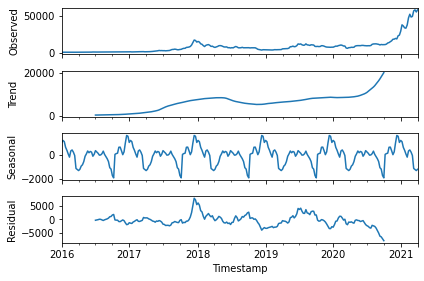

In [ ]:
# plotting the seasonal decomposition on non-log transformed column
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(btc.resample("W").median().Weighted_Price).plot()
plt.show()

<Figure size 1440x720 with 0 Axes>

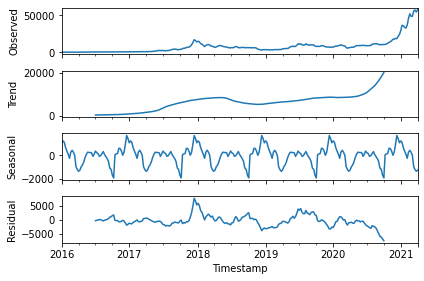

In [ ]:
# seasonal decomposition on weekly mean
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(btc.resample("W").mean().Weighted_Price).plot()
plt.show()

In [ ]:
# ADF test to find out whether the data is stationary or not
adf_hypothesis = sm.tsa.stattools.adfuller(btc.resample("W").mean().Weighted_Price)

print(f'ADF Statistics: {adf_hypothesis[0]:.2f}')
print(f'p-value: {adf_hypothesis[1]:.2f}')
print('Critical Values:')
for key, value in adf_hypothesis[4].items():
	print(f'\t {key}: {value:.2f}')
 
 # since the p-value is much much greater than 0.05, we failed to reject the null hypothesis (the time series is non-stationary which was our null hypothesis)

ADF Statistics: 1.69
p-value: 1.00
Critical Values:
	 1%: -3.46
	 5%: -2.87
	 10%: -2.57


<Figure size 1440x720 with 0 Axes>

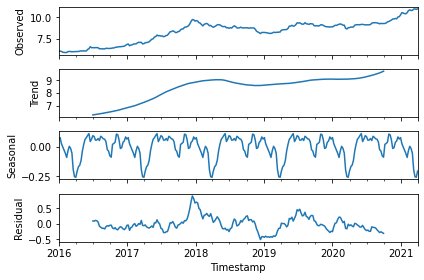

In [ ]:
# checking the hypothesis (adf) over the log transformed column
# plotting seasonal decomposition of time series into its trend, seasonality and residual components
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(btc.resample("W").median().Weighted_Price_log).plot()
plt.show()



In [ ]:

# Hypothesis testing to check the stationarity on this log transformed data
adf_hypothesis_log = sm.tsa.stattools.adfuller(btc.resample("W").mean().Weighted_Price_log)

print(f'ADF Statistics: {adf_hypothesis_log[0]:.2f}')
print(f'p-value: {adf_hypothesis_log[1]:.2f}')
print('Critical Values:')
for key, value in adf_hypothesis[4].items():
	print(f'\t {key}: {value:.2f}')
 # since the p-value is much much greater than 0.05 even after log transformation, we failed to reject the null hypothesis (the time series is non-stationary)

ADF Statistics: -0.47
p-value: 0.90
Critical Values:
	 1%: -3.46
	 5%: -2.87
	 10%: -2.57


#### Train - Validation - Test Data Split
1.   Using SKLearn train_test_split to randomly distribute the train test data
2.   KFold validation (general)
3.   Time Series Cross Validation (the test data is always from future)



In [ ]:
# importing libraries
import datetime
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit

#### 1. Train Test Random split


* So there is a big problem with random split. Here we can see that training data is all around the test data, so it is a mix up of train and test data

* As in real life, for TSA we will always consider future data for prediction, this train-test split can never give us good results



[]

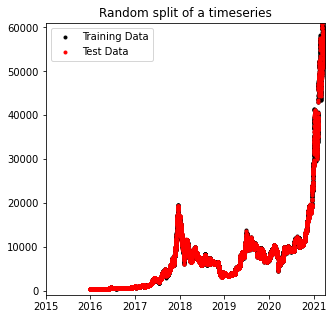

In [ ]:

fig, axs = plt.subplots(figsize=[5, 5])

# implementing model_selection.train_test_split to randomly split data
train, test = train_test_split(btc[["Weighted_Price"]])

axs.plot(train, 'k.', lw=10, label="Training Data")
axs.plot(test,'r.', lw=1, label="Test Data")
axs.set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
axs.set_ylim([-900, 61000])
axs.set_title(f"Random split of a timeseries")
axs.legend()
plt.plot()

#### 2. KFold Validation
*  Dataset is divided into 9:1 ratio, where 1th path is for validation. But this one part is not fixed and takes each chunk from 9+1=10 chunks in each round. There will be a total of 10 rounds in the above example

In [ ]:
cv = KFold()
cv # by default 5 splits are done
# KFold() kind of overcome the previous problem, but still our training data will be in between other training data

KFold(n_splits=5, random_state=None, shuffle=False)

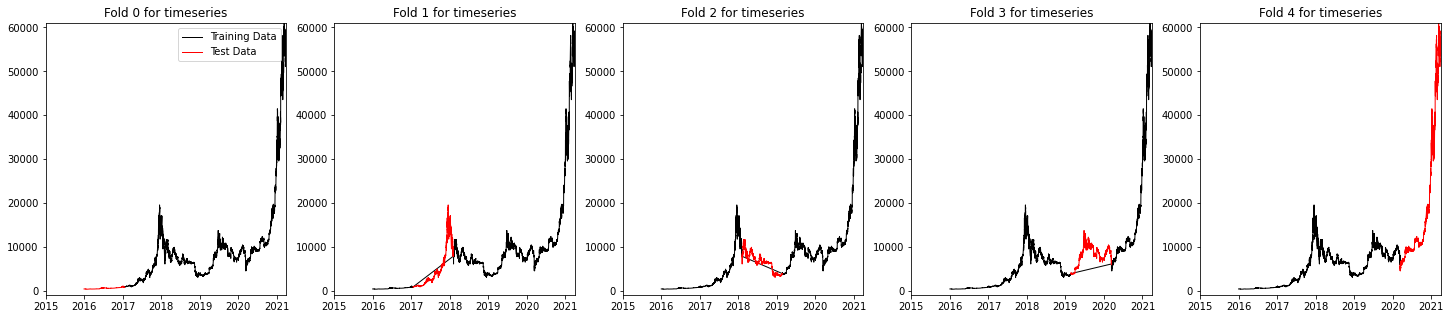

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

# implementing sklearn.model_selection.KFold
kfold_model = cv.split(btc.Weighted_Price)

# plotting the results for each splits
for i, (train_index, val_index) in enumerate(kfold_model):
    axs[i].plot(btc.Weighted_Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


#### 3. Time-Series Cross-Validation

This is better, but still not ideal. Each fold is contained by other data. Due to the time dependency, we know the order of the data and the machine learning system will exploit this information. Therefore, a real time-series solution must be used. This one only uses future data for validation:

![Time Series Split](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png) [[Source]](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split)


Read more in the complimentary ebook [Understanding Machine Learning Validation](https://dramsch.net/books/).


In [ ]:
tscv = TimeSeriesSplit()
tscv
# This is good as it always validates on the future data
# by default the n_splits = 5 set here for cross validation
# Here we split the dataset into 5 parts, and within each part the old data is considered as training data and the recent/newest data as the validation data

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

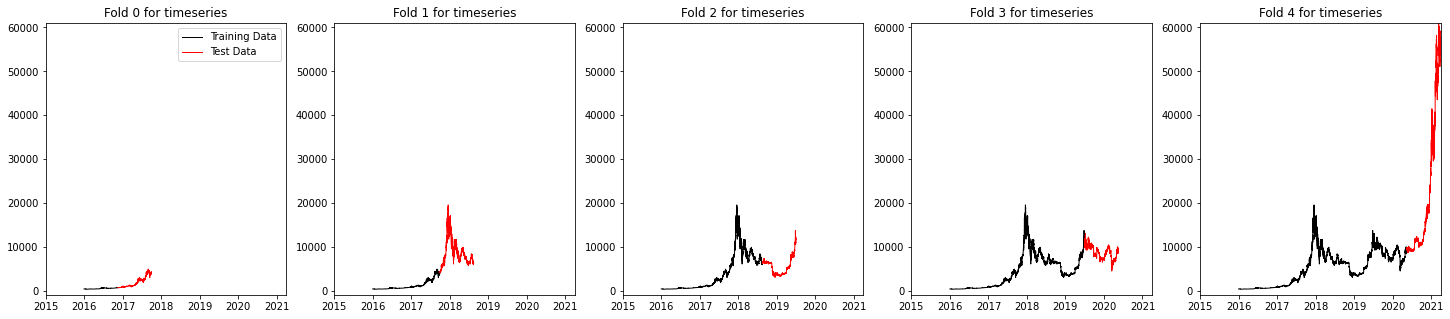

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

# splitting the data using time series split
tscv_split = tscv.split(btc.Weighted_Price)

for i, (train_index, val_index) in enumerate(tscv_split):
    axs[i].plot(btc.Weighted_Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


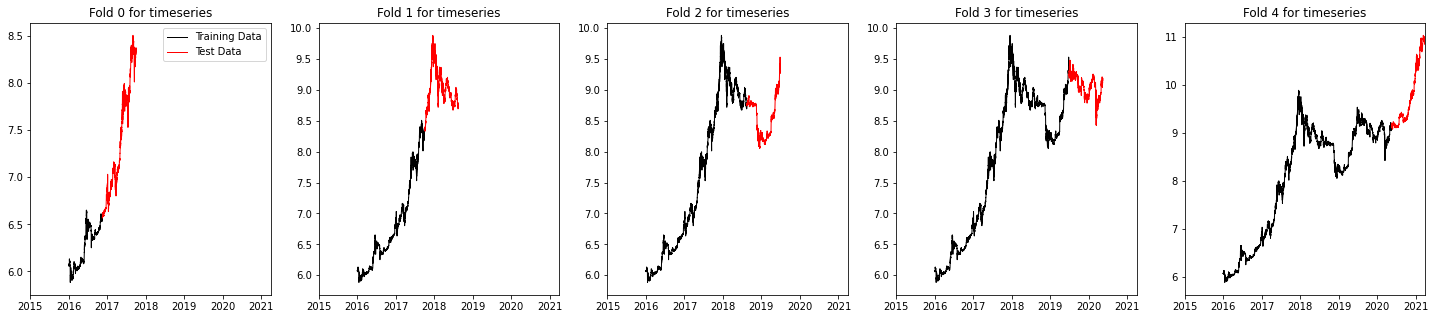

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

# using the log transformed data is best as in the last plot (5th one), we can see the training data is nowhere near the exponential growth that we see after 2020
# So to tackle this problem, we can use the log transformed column, 
tscv_split = tscv.split(btc.Weighted_Price_log)

for i, (train_index, val_index) in enumerate(tscv_split):
    axs[i].plot(btc.Weighted_Price_log[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price_log[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    #axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


#### Preparing Dataset and ML Models
1. SARIMA - classical ML for Time Series
2. FB prophet
3. XGBoost surpervised learning
4. LSTM - Deep Learning

#### SRIMA


In [ ]:
# Importing required libraries
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# again displaying the data
btc.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_log
Timestamp,,,,,,,,
2016-01-01 00:00:00,431.571842,431.683947,431.350526,431.466842,1.087394,469.169648,431.486899,6.069552
2016-01-01 01:00:00,430.470968,430.612258,430.317742,430.464194,1.006846,433.216050,430.461480,6.067178
2016-01-01 02:00:00,431.021923,431.075385,430.962308,431.013462,0.471009,202.855008,430.992236,6.068408
2016-01-01 03:00:00,431.493784,431.681892,431.373243,431.600811,2.026601,876.422114,431.577192,6.069761
2016-01-01 04:00:00,434.310408,434.438163,434.135306,434.281633,17.771499,7719.402352,434.306570,6.076051


In [ ]:
# SARIMA
# - S: Seasonal
# - AR: Auto Regressive model
# - I: Integrated
# - MA: Moving Average
split = int(btc.shape[0]*0.8)
print(split)

# classical statistical model for time series. Baseline model, to compare
# as daily data it will take time for processing
sarima = sm.tsa.statespace.SARIMAX(btc.Weighted_Price[:split],
                                   order=(1, 1, 2),
                                   seasonal_order=(1, 1, 2, 12),
                                   enforce_stationarity=False, # as our data is non-stationary thus enforce_stationarity as False
                                   enforce_invertibility=False)

results = sarima.fit()
print("Time Series AIC: " + str(results.aic))


36784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time Series AIC: 400641.8626775995


#### Preparring Dataset for Supervised Learning


In [ ]:
# Preparing dataset for TSA
#   n be the size of interval we consider
#   0-(n-1): as training data
#   n: as test data
# so it is like using n samples to predict one sample
def create_dataset(df, n, feature=0):
    x = []
    y = []

    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, feature])
        y.append(df[i, feature])
        
    x = np.expand_dims(np.array(x), -1) # this will insert one axis; here, from (m,n) --> (m,n,1)
    y = np.expand_dims(np.array(y), -1) # here if the dimension was (m) --> (m,1)
    return x, y 

In [ ]:
# Splitting the data 80% of data for traning and 20% for testing
split = int(btc.shape[0]*0.8)
print(split)
df_train = btc[:split]
df_test = btc[split:]
print(df_train.shape)

36784
(36784, 8)


In [ ]:
df_test.shape

(9197, 8)

In [ ]:
# feature scaling 
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(df_train)
dataset_train


array([[3.81530809e-03, 3.79800935e-03, 3.83970181e-03, ...,
        3.20933416e-04, 3.81898104e-03, 4.64886447e-02],
       [3.75801430e-03, 3.74225976e-03, 3.78588539e-03, ...,
        2.93058223e-04, 3.76559444e-03, 4.58948808e-02],
       [3.78668816e-03, 3.76635174e-03, 3.81947248e-03, ...,
        1.14456949e-04, 3.79322728e-03, 4.62023882e-02],
       ...,
       [2.89704073e-01, 2.90799428e-01, 2.88878243e-01, ...,
        4.81880483e-01, 2.89827257e-01, 7.01222297e-01],
       [2.95280004e-01, 2.96143732e-01, 2.94639652e-01, ...,
        2.56460351e-01, 2.95369174e-01, 7.05675457e-01],
       [2.98075672e-01, 2.98562502e-01, 2.97677301e-01, ...,
        1.31549689e-01, 2.98101832e-01, 7.07842417e-01]])

In [ ]:
# scaling the test dataset
dataset_test = scaler.transform(df_test)
dataset_test
# dataset test values are still going beyound 1: [3.03985716, 3.03899962, 3.04302417, ..., 0.1235554 , 3.04081593, 1.27507847]
# this can be possible arguably because, min_max scaler used the min and max from training data
# and testing data can have data beyond max_training_data

array([[0.2962345 , 0.29674814, 0.29582127, ..., 0.1286294 , 0.29628824,
        0.70640636],
       [0.30012272, 0.30068789, 0.29972455, ..., 0.13277224, 0.30015077,
        0.70945497],
       [0.29796739, 0.29832291, 0.2977635 , ..., 0.08501448, 0.29795274,
        0.70772467],
       ...,
       [3.04094975, 3.04044835, 3.04380348, ..., 0.0516422 , 3.04207092,
        1.27518105],
       [3.03465174, 3.03394748, 3.03776641, ..., 0.06136637, 3.0357346 ,
        1.2746627 ],
       [3.03985716, 3.03899962, 3.04302417, ..., 0.1235554 , 3.04081593,
        1.27507847]])

In [ ]:
# creating dataset for supervised learning
X_train, y_train = create_dataset(dataset_train,50,7)
X_test, y_test = create_dataset(dataset_test,50,7)


#### Evaluation Metrics

In [ ]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# It will calculate the R2_score and MAE
def evaluate_model(model, model_name="Model", test_data=X_test, target_data=y_test):
    y_pred_test = model.predict(test_data)

    try:
        y_pred_test = y_pred_test.yhat 
    except:
        pass

    test_rs = r2_score(target_data,y_pred_test)
    print('R Squared : ', round(test_rs,5))

    test_MAE = mean_absolute_error(target_data, y_pred_test)
    print('Mean Absolute Error: ', round(test_MAE, 5))

    plt.figure(figsize=(20,10))
    plt.plot(y_pred_test, color='green', marker='o', linestyle='dashed',label='Predicted Price')
    plt.plot(target_data, color='red', label='Actual Price')
    plt.title('Comparison of actual and predicted stock prices for ' + model_name)
    plt.xlabel('Day')
    plt.ylabel('Prices')
    plt.legend()
    plt.grid()
    plt.show()
    
    return test_rs, test_MAE

#### Facebook Prophet


In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 4.9 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640297 sha256=0acdd51c04ee6276f978cca21ef5aa455a183d3ccd2b62080d1f51c1802ffa01
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
# Phophet needs the dataset to be in a specific way
# it needs the datetime column under column "ds"
# and the predicting values under "y"
df_train.reset_index(inplace=True)
df_prophet = pd.DataFrame(columns=["ds", "y"])

df_prophet["ds"] = df_train.Timestamp
df_prophet["y"] = df_train.Weighted_Price
df_prophet

,ds,y
0,2016-01-01 00:00:00,431.486899
1,2016-01-01 01:00:00,430.461480
2,2016-01-01 02:00:00,430.992236
3,2016-01-01 03:00:00,431.577192
4,2016-01-01 04:00:00,434.306570
...,...,...
36779,2020-03-12 11:00:00,6109.125254
36780,2020-03-12 12:00:00,6049.553068
36781,2020-03-12 13:00:00,5924.966705
36782,2020-03-12 14:00:00,6031.412610


In [ ]:
# following the same structure for test dataset in order to use it in testing data
df_test.reset_index(inplace=True)
df_prophet_test = pd.DataFrame(columns=["ds", "y"])

df_prophet_test["ds"] = df_test.Timestamp
df_prophet_test["y"] = df_test.Weighted_Price
df_prophet_test

,ds,y
0,2020-03-12 16:00:00,6049.065567
1,2020-03-12 17:00:00,6123.254776
2,2020-03-12 18:00:00,6081.036189
3,2020-03-12 19:00:00,6047.960700
4,2020-03-12 20:00:00,5871.514519
...,...,...
9192,2021-03-30 20:00:00,58682.385127
9193,2021-03-30 21:00:00,58705.094588
9194,2021-03-30 22:00:00,58788.454429
9195,2021-03-30 23:00:00,58666.750127


In [ ]:
from prophet import Prophet

# defining the model
prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
prophet.fit(df_prophet) # training

# prediction
forecast = prophet.predict(df_prophet_test)
forecast.tail()



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9192,2021-03-30 20:00:00,20119.423410,-35608.684027,72593.522354,-33949.614494,75067.284722,-1795.768445,-1795.768445,-1795.768445,0.378247,...,5.170523,5.170523,5.170523,-1801.317215,-1801.317215,-1801.317215,0.0,0.0,0.0,18323.654966
9193,2021-03-30 21:00:00,20120.299527,-35490.527679,72841.233796,-33962.787072,75077.768819,-1792.254033,-1792.254033,-1792.254033,1.884866,...,4.845985,4.845985,4.845985,-1798.984884,-1798.984884,-1798.984884,0.0,0.0,0.0,18328.045494
9194,2021-03-30 22:00:00,20121.175643,-35697.175159,72351.012979,-33975.959650,75086.158857,-1788.169188,-1788.169188,-1788.169188,3.925553,...,4.554789,4.554789,4.554789,-1796.649530,-1796.649530,-1796.649530,0.0,0.0,0.0,18333.006455
9195,2021-03-30 23:00:00,20122.051760,-35739.908625,72781.299250,-33989.132228,75094.169382,-1784.142431,-1784.142431,-1784.142431,5.873841,...,4.294914,4.294914,4.294914,-1794.311187,-1794.311187,-1794.311187,0.0,0.0,0.0,18337.909329
9196,2021-03-31 00:00:00,20122.927877,-35570.362472,72540.967651,-34002.304807,75102.179908,-1781.235094,-1781.235094,-1781.235094,6.671352,...,4.063441,4.063441,4.063441,-1791.969887,-1791.969887,-1791.969887,0.0,0.0,0.0,18341.692783


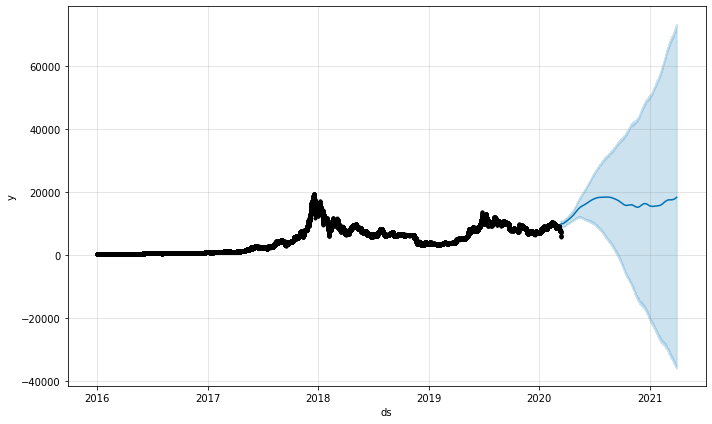

In [ ]:
fig = prophet.plot(forecast)
# plotting phophet forcast

R Squared :  0.00926
Mean Absolute Error:  10951.11048


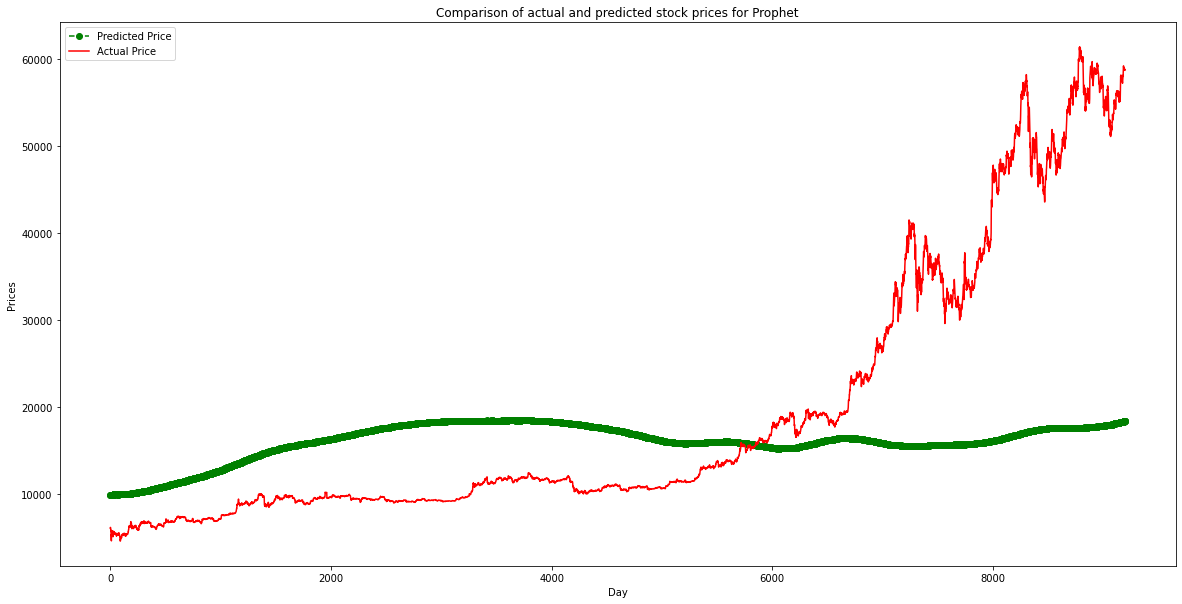

(0.009262234215237308, 10951.110480230733)

In [ ]:
# using our evaluation function to predict 
evaluate_model(prophet, "Prophet", df_prophet_test, df_prophet_test.y)

#### XGBoost for supervised learning

In [ ]:
import xgboost

# defining XGBoost Regressor
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(np.squeeze(X_train), np.squeeze(y_train)) # np.squeeze is to reduce the number of dimensions from say (m,n,1) to (m,n)


[23:12:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

R Squared :  0.60969
Mean Absolute Error:  0.0523


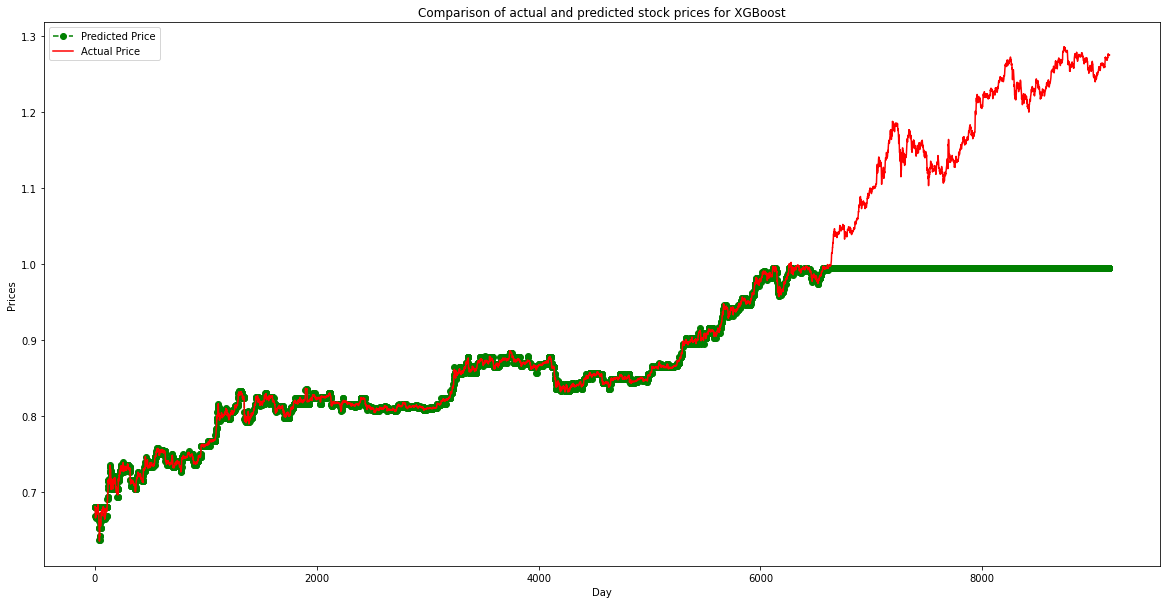

(0.6096859276083624, 0.05229789296474891)

In [ ]:
evaluate_model(xgb_model, model_name="XGBoost", test_data=np.squeeze(X_test), target_data=np.squeeze(y_test))
# the model performs poorly as we scaled the data between 0 to 1, so it couldn't predict outside that range
# because we kept the training feature scaling range (0,1)

#### LSTM

In [ ]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

from keras.callbacks import EarlyStopping # to overcome overfitting
from keras.callbacks import ModelCheckpoint

In [ ]:
# creating the deep learning model
LSTM_Model = Sequential()


In [ ]:
# building architecture of NN
LSTM_Model.add(LSTM(units=96,
                    return_sequences=True,
                    input_shape=(X_train.shape[1], 1)))
LSTM_Model.add(Dropout(0.2)) # dropout layer to avoid over-fitting
LSTM_Model.add(LSTM(units=96, 
                    return_sequences=True))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96, 
                    return_sequences=True))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(Dense(units=1)) # output layer

In [ ]:
LSTM_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [ ]:
# compiling the deep learning model with early stopping
LSTM_Model.compile(loss=MSE, optimizer=Adam())
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) # early stopping to avoid overfitting

In [ ]:
LSTM_Model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.05, callbacks=[es])
# we stopped as model is overfitting, as we can clearly see validation error going up and training loss going down

Epoch 1/10
1091/1091 [==============================] - 28s 14ms/step - loss: 0.0029 - val_loss: 1.3266e-04
Epoch 2/10
1091/1091 [==============================] - 14s 13ms/step - loss: 0.0011 - val_loss: 8.5517e-04
Epoch 2: early stopping


R Squared :  0.97812
Mean Absolute Error:  0.02318


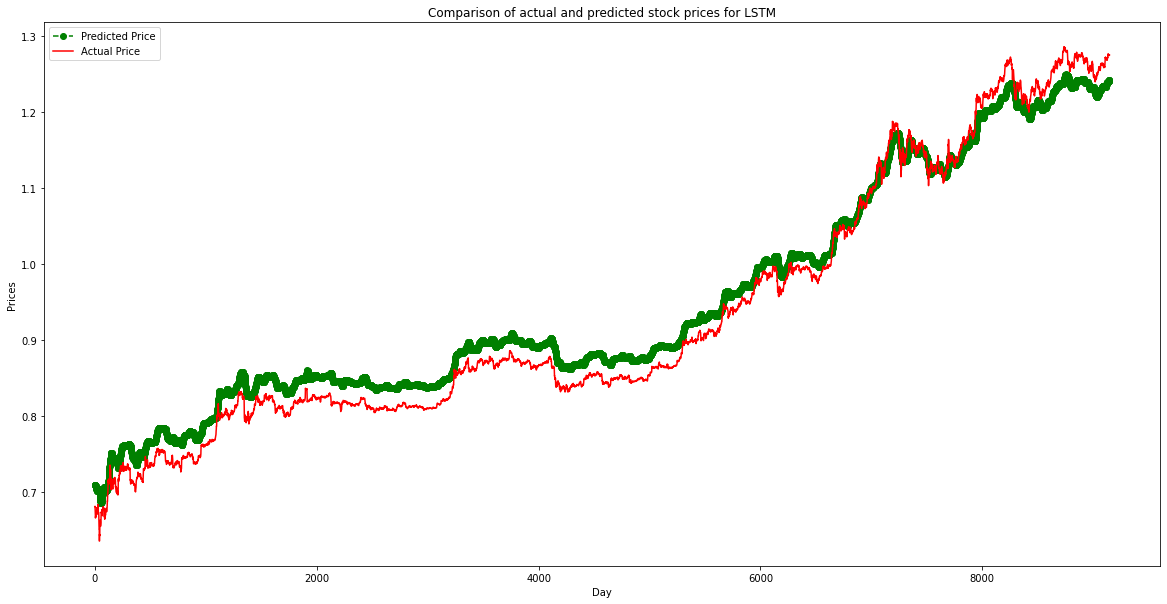

(0.9781208426084488, 0.023182056098139014)

In [ ]:
evaluate_model(LSTM_Model, "LSTM")
# evaluating using our already created function

#### Final Thoughts
*  the problem such finalcial models is we only consider the price parameter, 
*  there could be many other parameters like change in management, or any natural happening over a certain geographic location, etc. which cannot be used in the model beforehand